In [1]:
import neurolab as nl
import matplotlib.pyplot as plt

In [4]:
myinput = [[0, 0], [0, 1], [1, 0], [1, 1]]
target = [[0], [0], [0], [1]]

In [5]:
net = nl.net.newp([[0,1], [0,1]], 1)

In [6]:
error_progress = net.train(myinput, target, epochs = 100, show = 10, lr = 0.1)

The goal of learning is reached


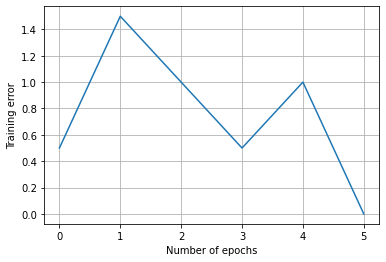

In [8]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.grid()
plt.show()

In [9]:
#Tek katmanlı sinir ağları

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [15]:
input_data = np.loadtxt('data/neural_simple.txt', delimiter = ',')
input_data

array([[2. , 4. , 0. , 0. ],
       [1.5, 3.9, 0. , 0. ],
       [2.2, 4.1, 0. , 0. ],
       [1.9, 4.7, 0. , 0. ],
       [5.4, 2.2, 0. , 1. ],
       [4.3, 7.1, 0. , 1. ],
       [5.8, 4.9, 0. , 1. ],
       [6.5, 3.2, 0. , 1. ],
       [3. , 2. , 1. , 0. ],
       [2.5, 0.5, 1. , 0. ],
       [3.5, 2.1, 1. , 0. ],
       [2.9, 0.3, 1. , 0. ],
       [6.5, 8.3, 1. , 1. ],
       [3.2, 6.2, 1. , 1. ],
       [4.9, 7.8, 1. , 1. ],
       [2.1, 4.8, 1. , 1. ]])

In [16]:
data = input_data[:, 0:2]
labels = input_data[:, 2:]

Text(0.5, 1.0, 'Input Data')

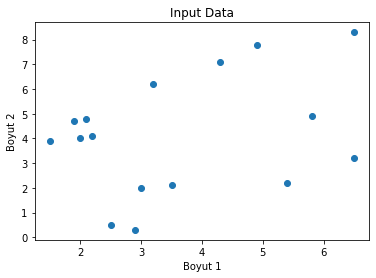

In [17]:
plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Boyut 1')
plt.ylabel('Boyut 2')
plt.title('Input Data')

In [18]:
dim1_min, dim1_max = data[:, 0].min(), data[:, 1].max()
dim2_min, dim2_max = data[:, 0].min(), data[:, 1].max()

In [19]:
nn_output_layer = labels.shape[1]
nn_output_layer

2

In [20]:
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
neural_net = nl.net.newp([dim1, dim2], nn_output_layer)

In [21]:
error = neural_net.train(data, labels, epochs = 200, show = 20, lr = 0.01)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
Epoch: 120; Error: 4.0;
Epoch: 140; Error: 4.0;
Epoch: 160; Error: 4.0;
Epoch: 180; Error: 4.0;
Epoch: 200; Error: 4.0;
The maximum number of train epochs is reached


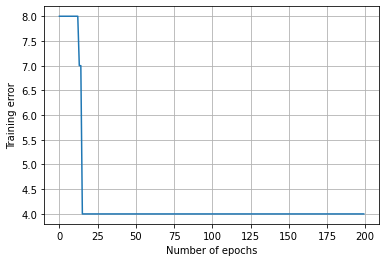

In [22]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.grid()
plt.show()

In [23]:
print('\n Test sonuçları')
data_test = [[1.5, 3.2], [3.6, 1.7], [3.6, 5.7], [1.6, 3.9]]
for item in data_test:
    print(item, '--->', neural_net.sim([item])[0])


 Test sonuçları
[1.5, 3.2] ---> [1. 0.]
[3.6, 1.7] ---> [1. 0.]
[3.6, 5.7] ---> [1. 1.]
[1.6, 3.9] ---> [1. 0.]


In [24]:
#Çok katmanlı sinir ağı
# y = 2x^2 + 8

In [25]:
min_val = -30
max_val = 30
num_points = 160
x = np.linspace(min_val, max_val, num_points)
y = 2 * np.square(x) + 8
y /= np.linalg.norm(y)

In [28]:
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

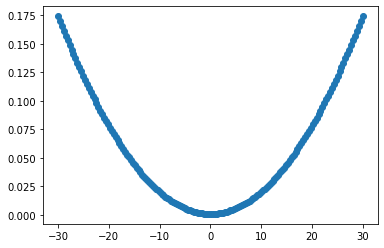

In [29]:
plt.figure()
plt.scatter(data, labels)

In [30]:
neural_net = nl.net.newff([[min_val, max_val]], [10,6,1])

In [31]:
neural_net.trainf = nl.train.train_gd

In [33]:
error = neural_net.train(data, labels, epochs = 1000, show = 100, goal = 0.01)

Epoch: 100; Error: 0.16198217789832722;
Epoch: 200; Error: 0.08102774658177314;
Epoch: 300; Error: 0.0663624096283763;
The goal of learning is reached


In [35]:
output = neural_net.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Training Error Progress')

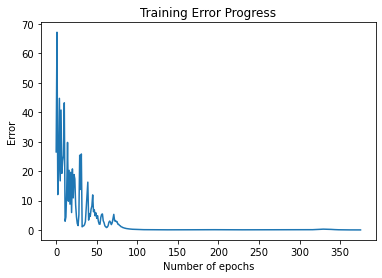

In [36]:
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training Error Progress')

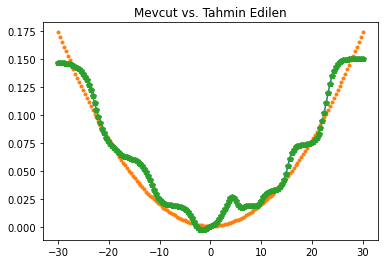

In [37]:
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = neural_net.sim(x_dense.reshape(x_dense.size, 1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Mevcut vs. Tahmin Edilen')
plt.show()

In [5]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [6]:
matrix1 = np.array([(2,2,2), (2,2,2), (2,2,2)], dtype = 'int32')
matrix2 = np.array([(1,1,1), (1,1,1), (1,1,1)], dtype = 'int32')
print(matrix1)
print(matrix2)

matrix1 = tf.constant(matrix1)
matrix2 = tf.constant(matrix2)
matrix_product = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1, matrix2)

matrix_3 = np.array([(2,7,2), (1,4,2), (9,0,2)], dtype = 'float32')
print(matrix_3)
matrix_det = tf.matrix_determinant(matrix_3)

with tf.Session() as sess:
    result1 = sess.run(matrix_product)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_det)
    
print(result1)
print(result2)
print(result3)

[[2 2 2]
 [2 2 2]
 [2 2 2]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]
[[6 6 6]
 [6 6 6]
 [6 6 6]]
[[3 3 3]
 [3 3 3]
 [3 3 3]]
55.999992
